In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Mukesh/OneDrive/Desktop/MSC STATS SY/ML/Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
data = data.drop(['balcony','society','availability'],axis=1)

In [7]:
data.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [9]:
data['location']=data['location'].fillna('Sarjapur  Road')

In [10]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [11]:
data['size']=data['size'].fillna('2 BHK')

In [12]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [13]:
data['BHK']=data['size'].str.split().str.get(0).astype(int)

In [14]:
data.drop(data[data['BHK']>10].index,inplace=True)

In [15]:
data.head(3)

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [16]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def convertRan(x):
    temp = x.split('-')
    if len(temp)==2:
        return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
data['total_sqft']=data['total_sqft'].apply(convertRan)

In [19]:
data.drop(['size'],inplace=True,axis=True)

In [20]:
data.head(3)

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3


## price per square feet

In [21]:
data['price_per_sqft']=(data['price']*100000)/data['total_sqft']

In [22]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13308, dtype: float64

In [23]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13262.000000,13308.000000,13308.000000,13308.000000,1.326200e+04
mean,1557.576364,2.677036,112.392106,2.789826,7.903955e+03
std,1234.052941,1.250893,148.840961,1.190666,1.064774e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.431469e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.308274e+03
max,52272.000000,14.000000,3600.000000,10.000000,1.200000e+07


In [24]:
data['location']=data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [25]:
location_count

Whitefield                 541
Sarjapur  Road             400
Electronic City            304
Kanakpura Road             273
Thanisandra                237
                          ... 
Brigade Road                 1
Nagarbhavi  BDA Complex      1
Rajanna Layout               1
Maruthi HBCS Layout          1
Abshot Layout                1
Name: location, Length: 1285, dtype: int64

In [26]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Nagappa Reddy Layout       10
1st Block Koramangala      10
Gunjur Palya               10
Naganathapura              10
BTM 1st Stage              10
                           ..
Brigade Road                1
Nagarbhavi  BDA Complex     1
Rajanna Layout              1
Maruthi HBCS Layout         1
Abshot Layout               1
Name: location, Length: 1044, dtype: int64

In [27]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [28]:
data['location'].value_counts()

other                 2875
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [29]:
(data['total_sqft']/data['BHK']).describe()

count    13262.000000
mean       575.364509
std        388.216474
min          0.250000
25%        473.831250
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [30]:
data = data[((data['total_sqft']/data['BHK'])>=250)]

In [31]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000
mean,1587.761534,2.566169,111.466723,2.661926,6348.787388
std,1253.269023,1.079373,151.631908,0.981915,4204.530424
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1114.000000,2.000000,49.000000,2.000000,4216.184288
50%,1300.000000,2.000000,70.000000,3.000000,5302.325581
75%,1700.000000,3.000000,116.000000,3.000000,6966.145833
max,52272.000000,14.000000,3600.000000,10.000000,176470.588235


In [32]:
def rmv_out_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        
        gen_df =subdf[(subdf.price_per_sqft>(m-std))&(subdf.price_per_sqft<(m+std))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
data = rmv_out_sqft(data)
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000
mean,1503.855501,2.474294,91.311440,2.579703,5681.414076
std,872.233194,0.972346,86.030785,0.891194,2296.480216
min,284.000000,1.000000,8.000000,1.000000,1250.000000
25%,1105.000000,2.000000,49.000000,2.000000,4239.631336
50%,1285.000000,2.000000,67.000000,2.000000,5183.823529
75%,1650.000000,3.000000,100.000000,3.000000,6466.302368
max,30400.000000,12.000000,2200.000000,10.000000,24509.803922


In [33]:
data['BHK'].value_counts()

2     4813
3     4074
4      784
1      533
5      119
6       67
7       25
8       17
9       10
10       3
Name: BHK, dtype: int64

In [34]:
data.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [35]:
data.drop(columns = ['price_per_sqft'],inplace=True)

In [36]:
data.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [37]:
data.to_csv("Cleanded_data1.csv")

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
# Encode categorical columns
encoder = LabelEncoder()
data['area_type'] = encoder.fit_transform(data['area_type'])
data['location'] = encoder.fit_transform(data['location'])

In [40]:
# Split data into features and target
X = data.drop(['price'], axis=1)
y = data['price']

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [43]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression - MSE: {:.2f}, R^2: {:.2f}".format(lr_mse, lr_r2))
print(lr_mse)
print(lr_r2)

Linear Regression - MSE: 2861.10, R^2: 0.65
2861.095025899307
0.6450154934893761


### Lasso Regression

In [44]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(lasso_mse)
print(lasso_r2)

2881.475583130323
0.64248681758537


### Ridge Regression

In [45]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(ridge_mse)
print(ridge_r2)

2861.2440002765998
0.6449970097985769


## Decision Tree

In [46]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print("Decision Tree Regression - MSE: {:.2f}, R^2: {:.2f}".format(dt_mse, dt_r2))
print(dt_mse)
print(dt_r2)

Decision Tree Regression - MSE: 3982.10, R^2: 0.51
3982.099456946227
0.5059291642520827


### Random Forest

In [47]:
# Random Forest Regression
# Random Forest Regression
rf = RandomForestRegressor(random_state=30)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest Regression - MSE: {:.2f}, R^2: {:.2f}".format(rf_mse, rf_r2))
print(rf_mse)
print(rf_r2)

Random Forest Regression - MSE: 2785.20, R^2: 0.65
2785.198859756273
0.6544321548866552


### K-Nearest Neighbors Regression

In [48]:
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print("K-Nearest Neighbors Regression - MSE: {:.2f}, R^2: {:.2f}".format(knn_mse, knn_r2))
print(knn_mse)
print(knn_r2)

K-Nearest Neighbors Regression - MSE: 3010.04, R^2: 0.63
3010.0366543192913
0.6265358659394531


### Support Vector Regression

In [49]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print("Support Vector Regression - MSE: {:.2f}, R^2: {:.2f}".format(svr_mse, svr_r2))
print(svr_mse)
print(svr_r2)

Support Vector Regression - MSE: 5095.72, R^2: 0.37
5095.715576512485
0.3677595246322847


In [50]:
# Compare models visually
models = ['Linear','Lasso','Ridge', 'Decision Tree', 'Random Forest', 'KNN', 'SVR']
mse_scores = [lr_mse,lasso_mse,ridge_mse,dt_mse, rf_mse, knn_mse, svr_mse]
r2_scores = [lr_r2,lasso_r2,ridge_r2, dt_r2, rf_r2, knn_r2, svr_r2]

Text(0, 0.5, 'MSE')

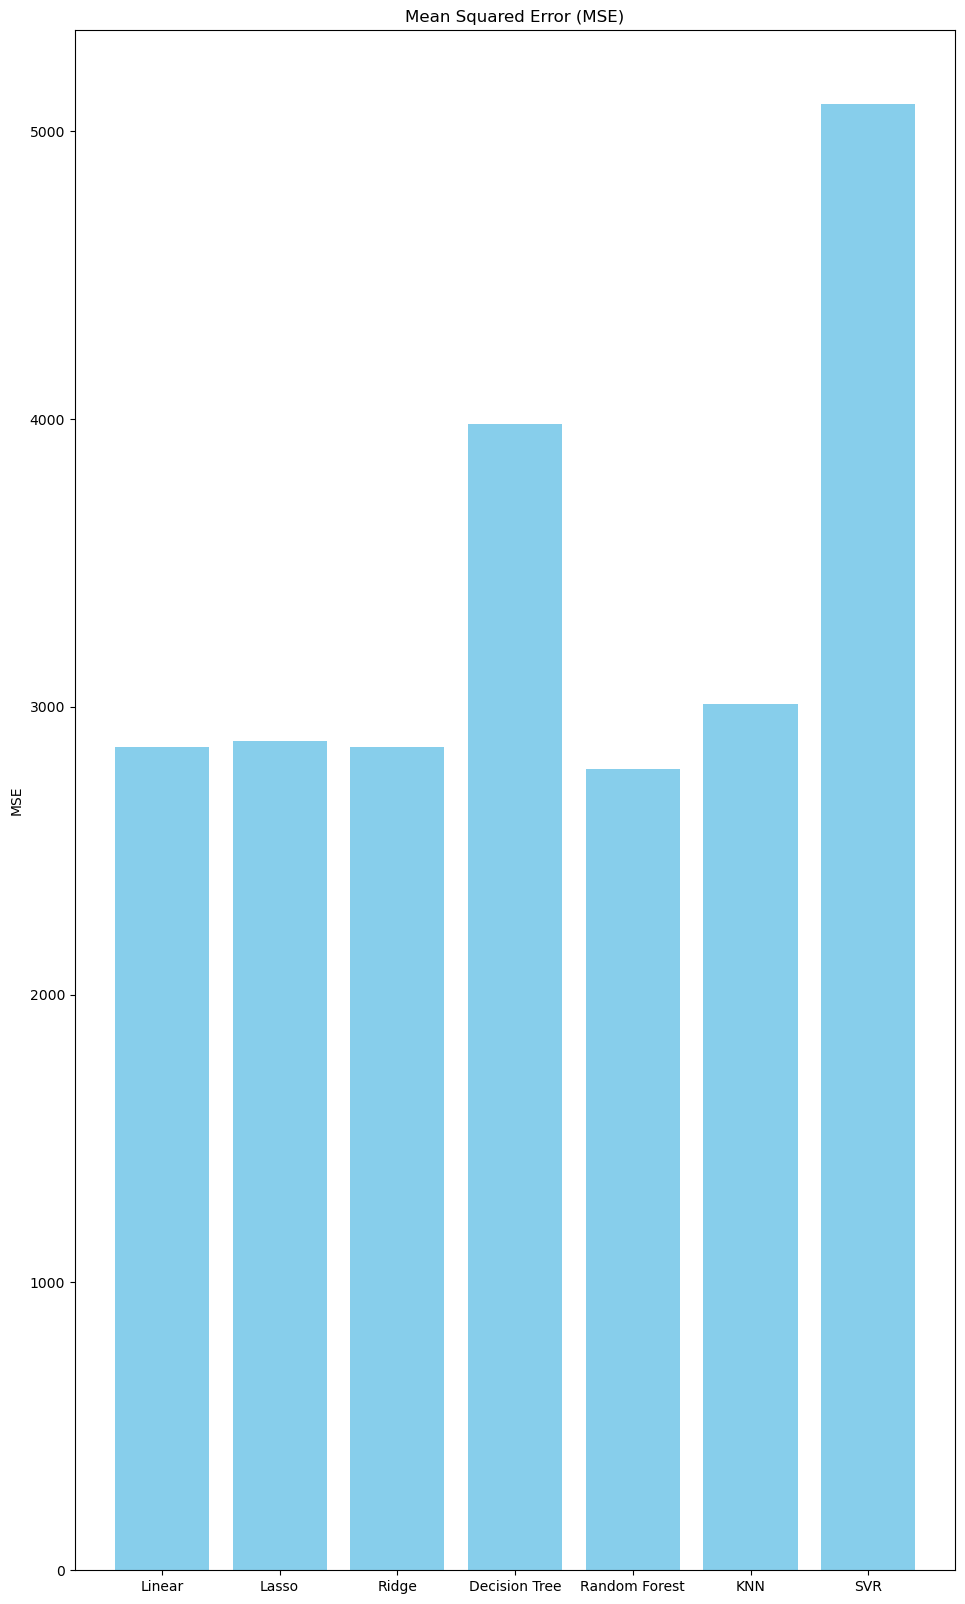

In [51]:
plt.figure(figsize=(25, 20))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

Text(0, 0.5, 'R^2')

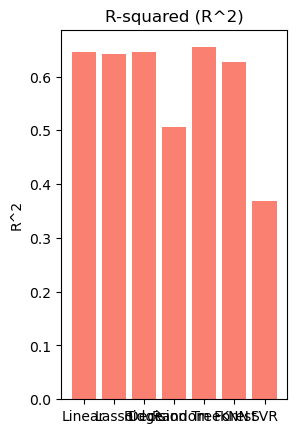

In [52]:

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='salmon')
plt.title('R-squared (R^2)')
plt.ylabel('R^2')

In [53]:
# Compare models visually
models = ['Linear','Lasso','Ridge', 'Decision', 'Random', 'KNN', 'SVR']
mse_scores = [lr_mse,lasso_mse,ridge_mse,dt_mse, rf_mse, knn_mse, svr_mse]
r2_scores = [lr_r2,lasso_r2,ridge_r2, dt_r2, rf_r2, knn_r2, svr_r2]

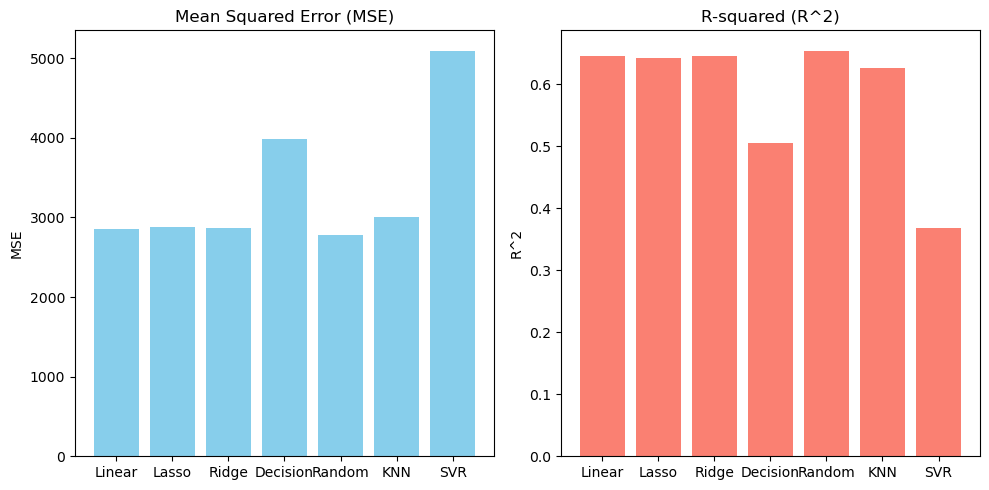

In [54]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='salmon')
plt.title('R-squared (R^2)')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()


In [67]:
import pickle
# Save the best model (Random Forest) using pickle
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# # Save the model to a file
# with open('house_price_model.pkl', 'wb') as model_file:
#     pickle.dump(best_model, model_file)

import joblib

# Save the model using joblib
joblib.dump(best_model, 'house_price_model.joblib')

['house_price_model.joblib']

In [55]:
# Initialize variables to store the best random state and the corresponding R^2 score
best_random_state = None
best_r2_score = -float('inf')

In [56]:
# Define the range of random states to try
random_state_range = range(1, 101)  # You can adjust this range

In [57]:
# Initialize lists to store R^2 scores for each model
lr_r2_scores = []
lasso_r2_scores = []
ridge_r2_scores = []
dt_r2_scores = []
rf_r2_scores = []
knn_r2_scores = []
svr_r2_scores = []

In [58]:
# # Specify the number of good random states to find
# num_good_random_states = 10  # You can adjust this number

In [59]:
# # Initialize a counter for good random states
# good_random_state_count = 0

In [60]:
# for random_state in random_state_range:
#     # Split the dataset into training and testing sets with the current random state
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#     # Fit the models
#     lr = LinearRegression()
#     lr.fit(X_train, y_train)
#     lr_pred = lr.predict(X_test)
#     lr_r2 = r2_score(y_test, lr_pred)
#     lr_r2_scores.append(lr_r2)
    
#     lasso = Lasso()
#     lasso.fit(X_train, y_train)
#     lasso_pred = lasso.predict(X_test)
#     #lasso_mse = mean_squared_error(y_test, lasso_pred)
#     lasso_r2 = r2_score(y_test, lasso_pred)
#     lasso_r2_scores.append(lasso_r2)
    
#     ridge = Ridge()
#     ridge.fit(X_train, y_train)
#     ridge_pred = ridge.predict(X_test)
#     #ridge_mse = mean_squared_error(y_test, ridge_pred)
#     ridge_r2 = r2_score(y_test, ridge_pred)
#     ridge_r2_scores.append(ridge_r2)

#     dt = DecisionTreeRegressor(random_state=42)
#     dt.fit(X_train, y_train)
#     dt_pred = dt.predict(X_test)
#     dt_r2 = r2_score(y_test, dt_pred)
#     dt_r2_scores.append(dt_r2)

#     rf = RandomForestRegressor(random_state=42)
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_r2 = r2_score(y_test, rf_pred)
#     rf_r2_scores.append(rf_r2)

#     knn = KNeighborsRegressor()
#     knn.fit(X_train, y_train)
#     knn_pred = knn.predict(X_test)
#     knn_r2 = r2_score(y_test, knn_pred)
#     knn_r2_scores.append(knn_r2)

#     svr = SVR()
#     svr.fit(X_train, y_train)
#     svr_pred = svr.predict(X_test)
#     svr_r2 = r2_score(y_test, svr_pred)
#     svr_r2_scores.append(svr_r2)
    
#     # Check if the current random state gave a higher R^2 score
#     if lr_r2 > best_r2_score:
#         best_r2_score = lr_r2
#         best_random_state = random_state

#     # Check if the current random state is considered "good"
#     if lr_r2 >= 0.8:  # You can adjust this threshold
#         good_random_state_count += 1

#     # Exit the loop if the desired number of good random states is found
#     if good_random_state_count >= num_good_random_states:
#         break

In [61]:
# # Check if the current random state gave a higher R^2 score
#     if lr_r2 > best_r2_score:
#         best_r2_score = lr_r2
#         best_random_state = random_state

In [62]:
# # Print the best random state and corresponding R^2 score
# print(f"Best Random State: {best_random_state}")
# print(f"Best R^2 Score: {best_r2_score:.2f}")

In [64]:
# # Plot R^2 scores for each model
# plt.figure(figsize=(10, 5))
# plt.plot(random_state_range, lr_r2_scores, label='Linear Regression', marker='o')
# plt.plot(random_state_range, dt_r2_scores, label='Decision Tree', marker='o')
# plt.plot(random_state_range, rf_r2_scores, label='Random Forest', marker='o')
# plt.plot(random_state_range, knn_r2_scores, label='KNN', marker='o')
# plt.plot(random_state_range, svr_r2_scores, label='SVR', marker='o')
# plt.xlabel('Random State')
# plt.ylabel('R^2 Score')
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# column_name = ['total_sqft','bath','price','BHK']

In [ ]:
# for i, column in enumerate(column_name):
#     plt.figure(figsize=(6, 4))
#     plt.boxplot(data[column], vert=False, boxprops=dict())
#     plt.title(f'Box Plot of {column}')
#     plt.xlabel('Value')
#     plt.show()